In [1]:
import pandas as pd 
import numpy as np 

In [2]:
raw_train = pd.read_csv('train.csv')

### Let's briefly examine the test dataset

In [10]:
raw_train.shape

(8693, 14)

In [3]:
raw_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
raw_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
raw_train['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

### Key observations:
    - the given dataset in not large, but not tiny
    - number of True and False instances is almost the same, this dataset is almost perfectly balanced 
    

### Let's train LogisticRegression

In [25]:
## For now, I'll drop all rows with missing values
train = raw_train.dropna(axis=0, how='any')

In [26]:
encoded_train = pd.get_dummies(train)
encoded_train.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
y = encoded_train['Transported']
X = encoded_train.drop('Transported', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
pipe = Pipeline([('std', StandardScaler()),('estimator', LogisticRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('estimator', LogisticRegression())])

In [29]:
y_hat = pipe.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted')

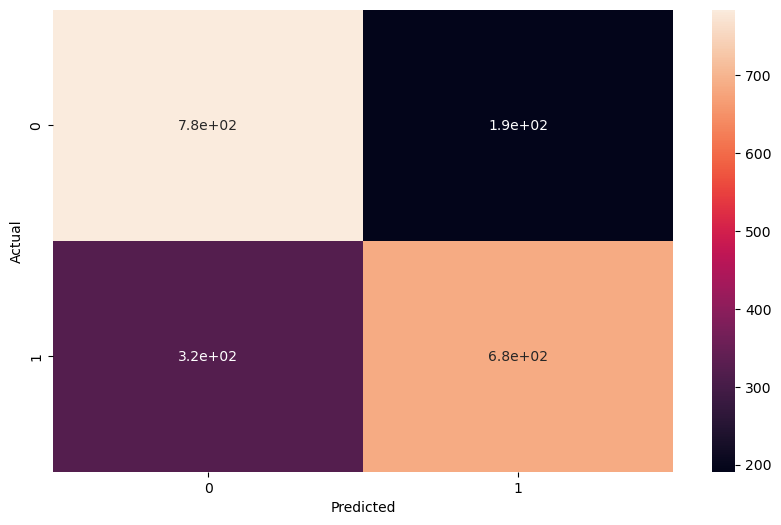

In [34]:
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [37]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

       False       0.71      0.80      0.75       975
        True       0.78      0.68      0.73      1007

    accuracy                           0.74      1982
   macro avg       0.75      0.74      0.74      1982
weighted avg       0.75      0.74      0.74      1982



### As an outcome, we have a model that has 74% accuracy. 
Not too bad, but I am going to show the way how to improve the model in the next notebook. 